# 2. Activity 10: Building Your Own Movie Database by Reading an API

## 1) Import **urllib.request**, **urllib.parse**, **urllib.error**, and **json**.

In [1]:
import urllib.request, urllib.parse, urllib.error
import json
import os
# from urllib.error import HTTPError, URLError

## 2) Load the secret API key from a JSON file stored in the same folder in a variable, by using `json.load()`.

## 3) *(2a)* Obtain a key and store it in JSON as **APIkeys.json**.
Done!

## 4) *(2b)* Open the **APIkeys.json** file.

In [2]:
with open('APIkey.json') as f:
    key = json.load(f)['OMDBapi']    

# 5) Assign the OMDB portal as a string to a variable.
(http://www.omdbapi.com/?)

In [3]:
omdbPortal = "http://www.omdbapi.com/?"

## 6) Create a variable called **apikey** with the last portion of the URL (**&apikey=secretapikey**), where **secretapikey** is your own API key.
The movie name portion i.e. "t=movie_name" will be addressed later

In [4]:
apiKey = "&apikey="+key

## 7) Write a utility function called **print_json** to print the movie data from a JSON file (which we will get from the portal).

In [32]:
def print_json(movieData):
    """
    Function to print movie data from a JSON file.
    """
    data = json.loads(movieData)
    for k, v, in data.items():
        print("{}:\n   {}".format(k, v))

In [8]:
def fetchMovieData(movieTitle):
    """
    Function to retrieve JSON data for a specified 
    movie from the "http://www.omdbapi.com/?" API.
    """
    urlTitle = urllib.parse.urlencode({'t': str(movieTitle)})
    url = omdbPortal + urlTitle + apiKey
    
    try:
        uh = urllib.request.urlopen(url)
    except HTTPError as e:
        print("So sorry, but we could not retreive anything on {}"
              .format(movieTitle))
        return None
    except URLError as e:
        print('Failed to reach a server. You know how it is.')
        print("Reason: {}".format(e.reason))
        return None
    else:
        data = uh.read().decode()
        print("Retrieved data on {}. Total {} characters read."
             .format(movieTitle, len(data)))
        return data

In [38]:
# movieTitle = "Titanic"
movieTitle = str(input("Enter the name of a movie: "))
movieData = fetchMovieData(movieTitle)

Enter the name of a movie:  Monty Python and the Holy Grail


Retrieved data on Monty Python and the Holy Grail. Total 1153 characters read.


In [39]:
print_json(movieData)

Title:
   Monty Python and the Holy Grail
Year:
   1975
Rated:
   PG
Released:
   25 May 1975
Runtime:
   91 min
Genre:
   Adventure, Comedy, Fantasy
Director:
   Terry Gilliam, Terry Jones
Writer:
   Graham Chapman, John Cleese, Eric Idle, Terry Gilliam, Terry Jones, Michael Palin
Actors:
   Graham Chapman, John Cleese, Eric Idle, Terry Gilliam
Plot:
   King Arthur and his Knights of the Round Table embark on a surreal, low-budget search for the Holy Grail, encountering many, very silly obstacles.
Language:
   English, French, Latin
Country:
   UK
Awards:
   3 wins & 3 nominations.
Poster:
   https://m.media-amazon.com/images/M/MV5BN2IyNTE4YzUtZWU0Mi00MGIwLTgyMmQtMzQ4YzQxYWNlYWE2XkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_SX300.jpg
Ratings:
   [{'Source': 'Internet Movie Database', 'Value': '8.2/10'}, {'Source': 'Rotten Tomatoes', 'Value': '97%'}, {'Source': 'Metacritic', 'Value': '91/100'}]
Metascore:
   91
imdbRating:
   8.2
imdbVotes:
   499,917
imdbID:
   tt0071853
Type:
   movie
DVD:
   N/A

In [21]:
# movieData = fetchMovieData(movieTitle)

In [22]:
# type(data)

In [23]:
# dataJSON = json.loads(data)

In [24]:
# type(dataJSON)

In [25]:
# print_json(data)

## 8) Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder.
Use the **os** module. The poster data is stored in the JSON key **Poster**. Use the Python command to open a file and write the poster data. Close the file after you're done. This functon will save the poster data as an image file.

Convert to JSON:

In [46]:
movieJSON = json.loads(movieData)

In [52]:
movie = movieJSON['Title']
movie

'Monty Python and the Holy Grail'

Retrieve Poster URL:

In [53]:
poster = movieJSON['Poster']
poster

'https://m.media-amazon.com/images/M/MV5BN2IyNTE4YzUtZWU0Mi00MGIwLTgyMmQtMzQ4YzQxYWNlYWE2XkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_SX300.jpg'

Retrieve file extension:

In [54]:
extension = movieJSON['Poster'].split('.')[-1]
extension

'jpg'

Read image file:

In [51]:
imgData = urllib.request.urlopen(poster).read()

Generate file name:

In [56]:
fileName = "{}.{}".format(str(movie), extension)
fileName

'Monty Python and the Holy Grail.jpg'

Save the file:

In [57]:
with open(fileName, 'wb') as f:
    f.write(imgData)

In [71]:
def posterTime(movieData):
    movieJSON = json.loads(movieData)
    
    # Grab movie Title and Poster data:
    movie = movieJSON['Title']
    poster = movieJSON['Poster']
    imgData = urllib.request.urlopen(poster).read()
    
    # Generate file info and save image:
    extension = movieJSON['Poster'].split('.')[-1]
    fileName = "{}.{}".format(str(movie), extension)
    try:
        with open(fileName, 'wb') as f:
            f.write(imgData)
        print('The following {} image was saved as:\n\t"{}":'
              .format(extension.upper(), fileName))
    except:
        print("Something went wrong. Image could not be saved.")

The following JPG image was saved as:
	"Monty Python and the Holy Grail.jpg":
<IPython.core.display.Image object>


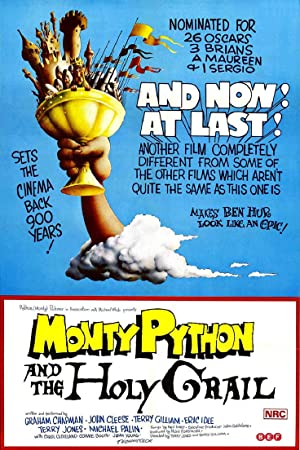

In [73]:
posterTime(movieData)
Image(fileName)

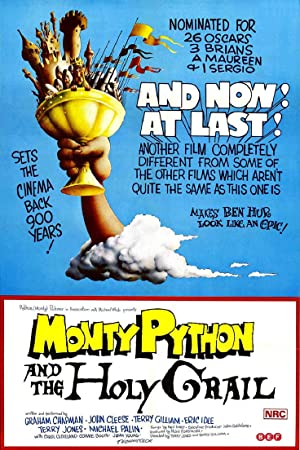

In [67]:
from IPython.display import Image
Image(filename=fileName) 

In [45]:
movieJSON['Poster']

'https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg'

In [12]:
title = 'Titanic'
url = omdbPortal + urllib.parse.urlencode({'t': str(title)}) + apiKey
uh = urllib.request.urlopen(url)
movieData = uh.read()
movieJSON = json.loads(movieData)

In [13]:
type(movieData)

bytes

In [17]:
type(movieJSON)

dict

In [51]:
movieJSON

{'Title': 'Titanic',
 'Year': '1997',
 'Rated': 'PG-13',
 'Released': '19 Dec 1997',
 'Runtime': '194 min',
 'Genre': 'Drama, Romance',
 'Director': 'James Cameron',
 'Writer': 'James Cameron',
 'Actors': 'Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates',
 'Plot': 'A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.',
 'Language': 'English, Swedish, Italian, French',
 'Country': 'USA, Mexico',
 'Awards': 'Won 11 Oscars. Another 112 wins & 83 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.8/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '89%'},
  {'Source': 'Metacritic', 'Value': '75/100'}],
 'Metascore': '75',
 'imdbRating': '7.8',
 'imdbVotes': '1,048,704',
 'imdbID': 'tt0120338',
 'Type': 'movie',
 'DVD': 'N/A',
 'BoxOffice': '$659,3

In [52]:
# print_json(movieData)